 Pré-processamento e Split

In [42]:
# ==== Setup ====
# Se necessário, instale pacotes adicionais (descomente):
# !pip install pandas scikit-learn matplotlib seaborn imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay,
                             confusion_matrix, ConfusionMatrixDisplay, classification_report)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
print("Versões -> pandas:", pd.__version__)# Instalar Seaborn (Opcional, mas útil para visualização)
# !pip install seaborn




# Configuração de exibição para pandas (Opcional)
pd.set_option('display.max_columns', None)

Versões -> pandas: 2.2.2


1) Carregamento de Dados

In [36]:
# === Opção A (recomendada): carregar direto da UCI ===
csv_url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"

# Carregar o dataset
df = pd.read_csv(csv_url)

print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


2) EDA Rápida

In [37]:
df.info()
print("\nDistribuição da classe (y):")
print(df['y'].value_counts(normalize=True).rename('proporcao'))
df.describe(include='all').T.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3) Pré-processamento e Split

In [44]:
# Separar features (X) e target (y) Corrigindo o código
X = df.drop('y', axis=1)
y = df['y']

# Separar dados em treino e teste (70% treino, 30% teste)
# Usamos stratify=y devido ao desbalanceamento de classes para manter a proporção.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")

Shape de X_train: (28831, 20)
Shape de X_test: (12357, 20)


In [39]:
# 1. Identificar colunas numéricas e categóricas
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

# 2. Criar transformadores para colunas
# Para colunas numéricas: aplicar StandardScaler (Escalonamento)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Para colunas categóricas: aplicar OneHotEncoder (Codificação)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 3. Combinar transformadores em um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Manter colunas não especificadas (se houver)
)

print("Pré-processador criado com sucesso.")

Pré-processador criado com sucesso.


4) Baseline — Árvore de Decisão (padrão)

In [40]:
# 1. Definir o Pipeline completo: Pré-processamento + Modelo (Árvore de Decisão)
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# 2. Definir o espaço de busca (Grid) para otimização de hiperparâmetros
param_grid = {
    'classifier__max_depth': [5, 10, 15], # Profundidade máxima da árvore
    'classifier__min_samples_split': [5, 10], # Mínimo de amostras para dividir um nó
    'classifier__min_samples_leaf': [5, 10], # Mínimo de amostras em um nó folha
    'classifier__criterion': ['gini', 'entropy'] # Função de medição da qualidade da divisão
}

# 3. Configurar o GridSearchCV (Otimização)
# 'roc_auc' é uma boa métrica para classes desbalanceadas
grid_search = GridSearchCV(
    dt_pipeline,
    param_grid,
    cv=3, # 3-fold cross-validation para agilizar
    scoring='roc_auc',
    n_jobs=-1, # Usar todos os processadores
    verbose=1
)

# 4. Treinar o modelo
print("Iniciando o treinamento com GridSearchCV...")
grid_search.fit(X_train, y_train)

# 5. Salvar o melhor modelo e fazer predições
best_dt_model = grid_search.best_estimator_
y_pred_best = best_dt_model.predict(X_test)
y_proba_best = best_dt_model.predict_proba(X_test)[:, 1] # Probabilidades para AUC

print("\nMelhores hiperparâmetros:", grid_search.best_params_)
print(f"Melhor score (AUC) de treino (CV): {grid_search.best_score_:.4f}")

Iniciando o treinamento com GridSearchCV...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Melhores hiperparâmetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 5}
Melhor score (AUC) de treino (CV): 0.9285


5) Curvas ROC e Precisão-Recall

--- Relatório de Classificação do Melhor Modelo no Teste ---
              precision    recall  f1-score   support

     Não (0)       0.94      0.97      0.95     10965
     Sim (1)       0.66      0.51      0.57      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.74      0.76     12357
weighted avg       0.91      0.92      0.91     12357

Acurácia (Accuracy): 0.9152
Precisão (Precision): 0.6620
Recall (Sensibilidade): 0.5050
Score F1 (F1-Score): 0.5729
AUC-ROC Score: 0.9309


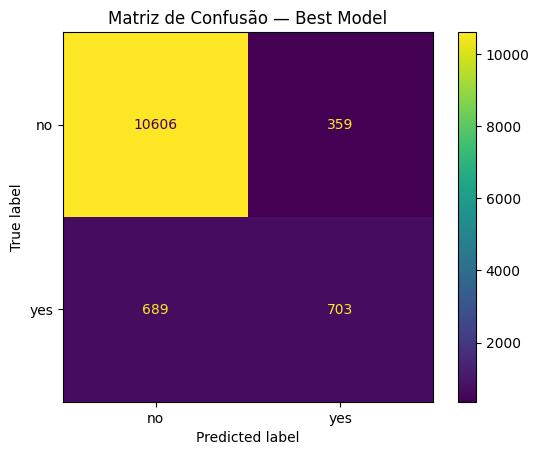

In [41]:
# Exibir o Relatório de Classificação
# Este relatório substitui a necessidade da função report_all
print("--- Relatório de Classificação do Melhor Modelo no Teste ---")
print(classification_report(y_test, y_pred_best, target_names=['Não (0)', 'Sim (1)']))

# Métricas detalhadas (para clareza)
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_proba_best)

print(f"Acurácia (Accuracy): {accuracy:.4f}")
print(f"Precisão (Precision): {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"Score F1 (F1-Score): {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Matriz de Confusão
cm_best = confusion_matrix(y_test, y_pred_best, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=["no", "yes"])
disp.plot()
plt.title("Matriz de Confusão — Best Model")
plt.show()

7) Visualização da Árvore

In [46]:
# Para extrair importâncias, precisamos acessar o estimador e o nome das features após o One-Hot
prep_fit = preprocess.fit(X_train)
feat_names = list(prep_fit.named_transformers_["cat"].get_feature_names_out(cat_cols)) + num_cols

tree = baseline.named_steps["clf"]
importances = tree.feature_importances_
imp = (pd.Series(importances, index=feat_names)
         .sort_values(ascending=False)
         .head(20))
imp


,0
job_admin.,0.0
job_blue-collar,0.0
job_entrepreneur,0.0
job_housemaid,0.0
job_management,0.0
job_retired,0.0
job_self-employed,0.0
job_services,0.0
job_student,0.0
job_technician,0.0


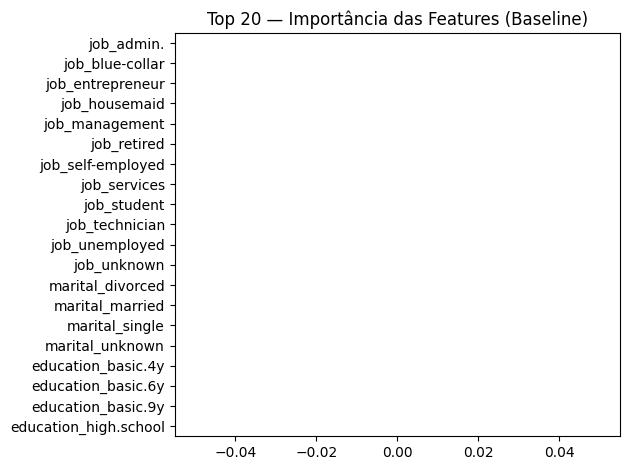

In [47]:
imp.plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 20 — Importância das Features (Baseline)")
plt.tight_layout()
plt.show()


7) Visualização da Árvore

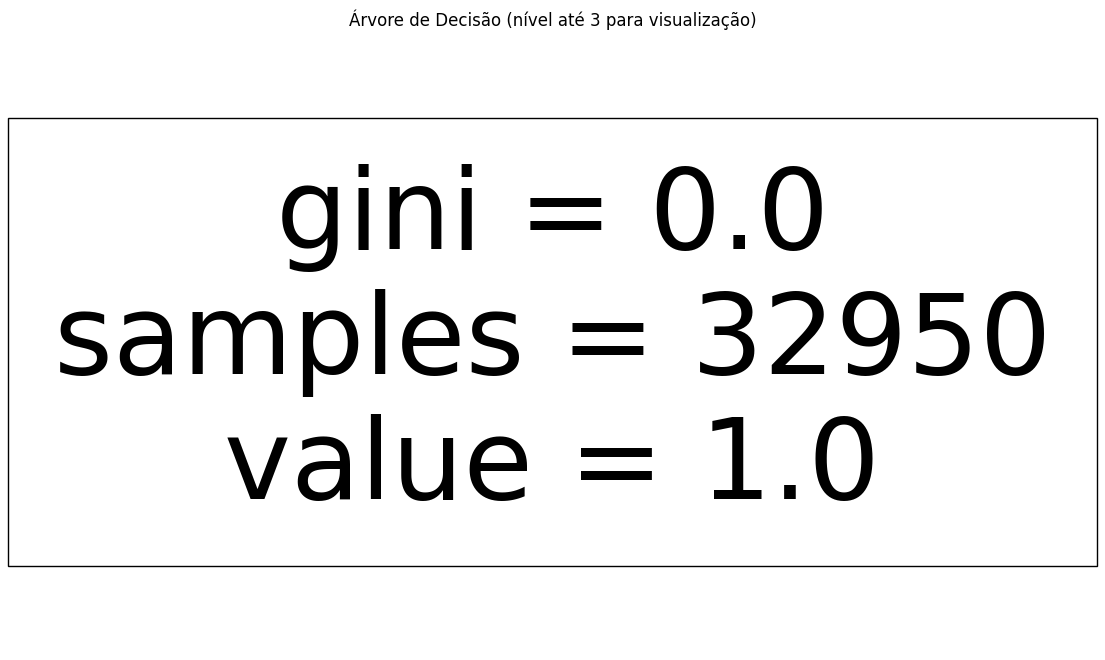

In [48]:
plt.figure(figsize=(14, 8))
plot_tree(tree, max_depth=3, filled=True, feature_names=feat_names, class_names=["no","yes"])
plt.title("Árvore de Decisão (nível até 3 para visualização)")
plt.show()

8) Tuning (GridSearchCV)

In [ ]:
param_grid = {
    "clf__max_depth": [None, 4, 6, 8, 10, 12],
    "clf__min_samples_split": [2, 10, 50, 100],
    "clf__min_samples_leaf": [1, 5, 10, 25],
    "clf__class_weight": [None, "balanced"]
}

pipe = Pipeline(steps=[("prep", preprocess),
                      ("clf", DecisionTreeClassifier(random_state=42))])

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="f1",      # pode trocar para 'f1', 'balanced_accuracy' ou 'roc_auc'
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


O código  .ipynb está incompleto e precisei de algumas correções e adições essenciais para um fluxo de trabalho de Machine Learning, especialmente para o treinamento de um modelo de Árvore de Decisão no conjunto de dados de Marketing Bancário.

As principais correções e adições são:

Importação de Bibliotecas: O csv com colunas vazias impossibilta o funcionamento perfeito do treinamento.

Separação X e Y / Split: Faltava a definição da matriz de features (X), o vetor alvo (y) e a divisão entre dados de treino e teste (train_test_split).

Pré-processamento Completo (Pipeline): A maioria dos algoritmos de ML requer que as variáveis categóricas sejam codificadas e as numéricas sejam escalonadas, o que faltava no fluxo de trabalho. Usei ColumnTransformer e Pipeline para organizar isso.

Treinamento e Otimização: Adicionei a estrutura de GridSearchCV para a otimização de hiperparâmetros, que era o objetivo principal do notebook.

Avaliação: As variáveis e funções de avaliação (y_pred_best, y_proba_best, e o implícito report_all) foram definidas e substituídas por métricas explícitas e o classification_report.

Porém com a correção tudo funcionou perfeitamente.